In [2]:
import random
import math
import gc
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
class TicTacToe:

    winning_combinations = [
      [0,1,2],
      [3,4,5],
      [6,7,8],
      [0,3,6],
      [1,4,7],
      [2,5,8],
      [0,4,8],
      [2,4,6]
    ]

    def __init__(self):
        self.data = []
        self.status = "Ongoing"
        self.board = np.zeros(9)
        self.winner = 0
        self.next_player = 1
        self.winning_combination = []

    def check_if_winner(self):
        for i in range(len(TicTacToe.winning_combinations)):
            if np.all( self.board[TicTacToe.winning_combinations[i]] == self.next_player):
                self.winner = self.next_player
                self.winning_combination = TicTacToe.winning_combinations[i]
        return True

      return False

    def switch_player(self):
        if self.next_player==1:
            self.next_player = 2
        elif self.next_player==2:
            self.next_player = 1
        else:
            print("Error!! Invalid player")
        return

    def next_moves(self):
        if self.status != 'Ongoing':
            return list()
        next_boards = list()
        for i in range(9):
            if self.board[i]==0:
                next_board = np.copy(self.board)
                next_board[i] = self.next_player
                next_boards.append(next_board)
        return next_boards

    def play(self,board):
        self.board = board
        #print(board, self.check_if_winner())
        if self.check_if_winner():
            #print("[Winner]:", self.winner)
            #print("combination: ", self.winning_combination)
            self.status = "Winner"
        else:
            self.switch_player()
            if np.count_nonzero(board==0)==0:
                self.status = "Draw"




In [4]:
ttt = TicTacToe()

while ttt.status=="Ongoing":

    valid_moves = ttt.next_moves()
    new_board = random.choice(valid_moves)
    ttt.play(new_board)
    print(np.reshape(ttt.board, (3,3)),"\n")
    if len(valid_moves)==0:
        break

print("[Winner]:",ttt.winner)

[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]] 

[[0. 0. 0.]
 [0. 0. 1.]
 [0. 2. 0.]] 

[[0. 0. 0.]
 [0. 0. 1.]
 [0. 2. 1.]] 

[[2. 0. 0.]
 [0. 0. 1.]
 [0. 2. 1.]] 

[[2. 0. 0.]
 [0. 0. 1.]
 [1. 2. 1.]] 

[[2. 0. 0.]
 [0. 2. 1.]
 [1. 2. 1.]] 

[[2. 1. 0.]
 [0. 2. 1.]
 [1. 2. 1.]] 

[[2. 1. 0.]
 [2. 2. 1.]
 [1. 2. 1.]] 

[[2. 1. 1.]
 [2. 2. 1.]
 [1. 2. 1.]] 

[Winner]: 1


In [48]:
winning_combination_tensor = tf.constant(TicTacToe.winning_combinations, dtype=tf.float32)

hidden_dimensions = 81

combinations = tf.constant(
    [
        [1,0,0,1,0,0,1,0,0],
        [0,1,0,0,1,0,0,1,0],
        [0,0,1,0,0,1,0,0,1],
        [1,1,1,0,0,0,0,0,0],
        [0,0,0,1,1,1,0,0,0],
        [0,0,0,0,0,0,1,1,1],
        [1,0,0,0,1,0,0,0,1],
        [0,0,1,0,1,0,1,0,0]
    ]
)

inputs = tf.constant([[0, 0, 0, 0, 0, 0, 0, 2, 1],[0, 1, 2, 1, 0, 0, 0, 0, 0]], dtype=tf.float32)
print(inputs)

x = tf.one_hot(tf.cast(inputs, tf.int32),3)
x = tf.keras.layers.Flatten()(x)
#x = tf.keras.layers.CategoryEncoding(num_tokens=3, output_mode='multi_hot')(inputs)
print(x)
x = tf.keras.layers.MultiHeadAttention(num_heads=4, key_dim=4, attention_axes=1)(x,x)
#x = tf.keras.layers.Flatten()(x)
#x = tf.keras.layers.Conv1D(81, 2, activation=tf.nn.softplus)(inputs)
print(x)
print(tf.shape(x))
x = tf.keras.layers.Dense(hidden_dimensions, activation=tf.nn.softplus)(x)
print(tf.shape(x))
x = tf.keras.layers.Dropout(0.3)(x)
#x = tf.concat([winning_x, flatten_inputs, x],axis=1)
x = tf.concat([inputs, x],axis=1)
print(tf.shape(x))
x = tf.keras.layers.Dense(9, activation=tf.nn.softplus)(x),
print(tf.shape(x))
x = tf.reshape(x, (2, 9))
zero = tf.constant(0, dtype=tf.float32)
mask = tf.equal(inputs, zero)
print(x)
x = tf.keras.layers.Softmax(axis=[0,1])(x, mask=mask)
print(x)

outputs = x


tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 2. 1.]
 [0. 1. 2. 1. 0. 0. 0. 0. 0.]], shape=(2, 9), dtype=float32)
tf.Tensor(
[[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
  0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
  1. 0. 0.]], shape=(2, 27), dtype=float32)
tf.Tensor(
[[ 0.07930906  0.01966017 -0.02400919 -0.05722496  0.00539762  0.02545218
  -0.00449527 -0.09081045  0.00367524  0.07501811  0.05860699 -0.01500759
   0.02370354  0.06868894  0.0305292  -0.06255393 -0.07319149  0.00691426
  -0.07846208 -0.03812003 -0.01510746  0.01097241 -0.0096074  -0.01079366
   0.02589735  0.04626542 -0.00997682]
 [ 0.01504448  0.0047941   0.02456363 -0.07343256 -0.07114045 -0.00149694
  -0.05947949  0.01347139  0.06852594  0.10117677  0.05127265 -0.0601336
   0.0259386   0.06795147  0.00122152 -0.01544878 -0.03384199 -0.09714827
  -0.02290268  0.0303538  -0.09102869 -0.03694913  0.01045362  0.01931839
   0.00673071 -0.05206973  0.06020222]], s

In [6]:
class MaskPlayed(tf.keras.layers.Layer):

    def __init__(self):
        super().__init__()
        self.trainable = True

    def call(self, inputs, x):
        zero = tf.constant(0, dtype=tf.float32)
        mask = tf.equal(inputs, zero)
        masked = tf.where(mask, x, tf.zeros_like(x))

    return masked


In [197]:
def create_Q():
    
    activation_fn = tf.nn.leaky_relu
    
    winning_combination_tensor = tf.constant(TicTacToe.winning_combinations, dtype=tf.float32)

    hidden_dimensions = 256
    depth = 1

    inputs = tf.keras.layers.Input((9))

    x = tf.one_hot(tf.cast(inputs, tf.int32),3)
    one_hot_inputs = tf.keras.layers.Flatten()(x)
    
    #x = tf.keras.layers.MultiHeadAttention(num_heads=120, key_dim=120, attention_axes=1)(one_hot_inputs,one_hot_inputs)
    x = tf.keras.layers.Dense(hidden_dimensions, activation=activation_fn)(one_hot_inputs)
    x = tf.keras.layers.Dropout(0.3)(x)
    for i in range(depth):
        x = tf.keras.layers.Dense(hidden_dimensions, activation=activation_fn)(x)
        x = tf.keras.layers.Dropout(0.3)(x)
    #x = tf.keras.layers.Dense(27, activation=activation_fn)(x)
    #x = tf.keras.layers.Dropout(0.3)(x)
    
    #x = tf.concat([one_hot_inputs, x],axis=1)
    
    x = tf.keras.layers.Dense(9, activation=tf.nn.sigmoid)(x)
    x = tf.reshape(x, (-1,9))
    x = MaskPlayed()(inputs, x)

    outputs = x

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="tictactoe_model")

    return model


In [198]:
Q = create_Q()

In [199]:
output = Q( np.array([[0., 0., 0., 0., 0., 0., 0., 1., 2.]]) )
output

<tf.Tensor: shape=(1, 9), dtype=float32, numpy=
array([[0.48128048, 0.5375245 , 0.4783451 , 0.54022855, 0.5386018 ,
        0.50539285, 0.48646772, 0.        , 0.        ]], dtype=float32)>

In [200]:
Q.summary()

Model: "tictactoe_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_45 (InputLayer)          [(None, 9)]          0           []                               
                                                                                                  
 tf.cast_44 (TFOpLambda)        (None, 9)            0           ['input_45[0][0]']               
                                                                                                  
 tf.one_hot_44 (TFOpLambda)     (None, 9, 3)         0           ['tf.cast_44[0][0]']             
                                                                                                  
 flatten_51 (Flatten)           (None, 27)           0           ['tf.one_hot_44[0][0]']          
                                                                                    

In [201]:
tf.keras.utils.plot_model(Q, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [202]:
zero_weights = []
for arr in Qs[1].get_weights():
    zero_weights.append(np.zeros(arr.shape))
Qs[1].set_weights(zero_weights)
Qs[2].set_weights(zero_weights)

In [203]:
BATCH_SIZE = 100

N = 120
M = BATCH_SIZE
N_replay = 2

Qs = {1:create_Q(), 2:create_Q()}

history = {
    'loss':[],
    'draw':[],
    'X':[],
    'O':[]
    }

epsilon = 0.3
gamma = tf.constant(0.9)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

for n in range(N):

  winners = []

  played_boards = []
  board_rewards = {1:[],2:[]}
  Q_j_plus_1 = {1:[],2:[]}

  ttt_games = [TicTacToe() for i in range(M)]

  # loop over the maximum length of the game
  for turn in range(9):

    current_boards = tf.concat([ ttt_games[i].board[np.newaxis,...] for i in range(len(ttt_games))], axis=0)
    
    board_scores = (Qs[ttt_games[0].next_player](current_boards))
    #print("[scores]", board_scores)

    best_scores = tf.math.argmax(board_scores,axis=1)
    #print("[best score]", best_scores)

    # loop over all the single games
    for i in range(M):
      game = ttt_games[i]
      if game.status=="Ongoing":

        next_boards = game.next_moves()

        if random.random()>epsilon:
          next_board = game.board
          next_board[best_scores[i]] = game.next_player
        else:
          draw = np.random.choice(range(len(next_boards)))
          next_board = next_boards[draw]

        game.play(next_board)
      
      for p in board_rewards:
        if game.status=="Ongoing":
          board_rewards[p] += [0.0]
        elif game.status == "Winner":
          if p==game.winner:
            board_rewards[p].append(1.0)
          else:
            board_rewards[p].append(0.0)
        
        elif game.status == "Draw":
          board_rewards[p] += [0.0]

        else:
          print("Something is wrong")

    current_boards = tf.concat([ ttt_games[i].board[np.newaxis,...] for i in range(len(ttt_games))], axis=0)
    played_boards.append(current_boards)
    #print("[boards]", current_boards)

    for i in range(len(ttt_games)):

      next_boards = ttt_games[i].next_moves()

      if len(next_boards)>0:
        forward_boards = tf.concat([ b[np.newaxis,...] for b in next_boards], axis=0)

        for p in Q_j_plus_1:
          forward_scores = (Qs[p](forward_boards))
          qs_plus_1 = tf.reduce_max(forward_scores).numpy()
          Q_j_plus_1[p].append(qs_plus_1)
        
      else:
        for p in Q_j_plus_1:
          Q_j_plus_1[p].append(0.0)

    # for p in board_rewards:
    #   print("[Q+1",p,"]", Q_j_plus_1[p][-BATCH_SIZE:])
    #   print("[R ",p,"]", board_rewards[p][-BATCH_SIZE:])
  
  played_boards = tf.concat(played_boards, axis=0)
  for p in Q_j_plus_1:
    Q_j_plus_1[p] = tf.concat(Q_j_plus_1[p], axis=0)

  for game in ttt_games:
    winners.append(game.winner)

  
  total_loss = 0

  for p in board_rewards:

    for retrain in range(N_replay):
      
      training_replay = random.sample(range(played_boards.shape[0]), BATCH_SIZE)

      training_boards = tf.concat( [played_boards[i,...][np.newaxis,...] for i in training_replay], axis=0 )

      rewards = [ board_rewards[p][i] for i in training_replay ]

      q_plus_1 = [ Q_j_plus_1[p][i] for i in training_replay]

      #print(tf.shape(training_boards), tf.shape(rewards), tf.shape(q_plus_1))

      with tf.GradientTape() as tape:
        y = Qs[p](training_boards, training=True)
        y = tf.math.reduce_max(y,axis=1)
        loss_values = tf.math.square(rewards + gamma*q_plus_1 - y)
        #print(y,loss_values)

      grads = tape.gradient(loss_values, Qs[p].trainable_variables)
      optimizer.apply_gradients(zip(grads, Qs[p].trainable_variables))
      total_loss += tf.reduce_mean(loss_values)
  
  print(n+1,[(x,winners.count(x)/M) for x in set(winners)], total_loss.numpy())
  history['loss'].append(total_loss)
  history['draw'].append(winners.count(0)/M)
  history['X'].append(winners.count(1)/M)
  history['O'].append(winners.count(2)/M)


1 [(0, 0.03), (1, 0.51), (2, 0.46)] 0.29160872
2 [(0, 0.08), (1, 0.67), (2, 0.25)] 0.34006765
3 [(0, 0.26), (1, 0.39), (2, 0.35)] 0.26028898
4 [(0, 0.4), (1, 0.42), (2, 0.18)] 0.21885797
5 [(0, 0.26), (1, 0.55), (2, 0.19)] 0.2760272
6 [(0, 0.35), (1, 0.48), (2, 0.17)] 0.22120878
7 [(0, 0.46), (1, 0.33), (2, 0.21)] 0.16719545
8 [(0, 0.37), (1, 0.48), (2, 0.15)] 0.2733004
9 [(0, 0.43), (1, 0.49), (2, 0.08)] 0.18731761
10 [(0, 0.33), (1, 0.49), (2, 0.18)] 0.24178258
11 [(0, 0.32), (1, 0.52), (2, 0.16)] 0.24094419
12 [(0, 0.47), (1, 0.45), (2, 0.08)] 0.14383927
13 [(0, 0.43), (1, 0.51), (2, 0.06)] 0.13902947
14 [(0, 0.42), (1, 0.51), (2, 0.07)] 0.2073242
15 [(0, 0.48), (1, 0.45), (2, 0.07)] 0.17760332
16 [(0, 0.42), (1, 0.54), (2, 0.04)] 0.15550359
17 [(0, 0.46), (1, 0.47), (2, 0.07)] 0.1547902
18 [(0, 0.51), (1, 0.43), (2, 0.06)] 0.11750673
19 [(0, 0.54), (1, 0.37), (2, 0.09)] 0.14595951
20 [(0, 0.58), (1, 0.36), (2, 0.06)] 0.11943253
21 [(0, 0.2), (1, 0.73), (2, 0.07)] 0.18660446
22 [(0,

In [174]:
BATCH_SIZE = 100
N = 120
M = BATCH_SIZE
N_replay = 5

Qs = {1:create_Q(), 2:create_Q()}

history = {
    'loss':[],
    'draw':[],
    'X':[],
    'O':[]
    }

epsilon = 0.3

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

for n in range(N):

  winners = []

  played_boards = []
  board_rewards = {1:np.array([]),2:np.array([])}

  ttt_games = [TicTacToe() for i in range(M)]

  # loop over the maximum length of the game
  for turn in range(9):

    current_boards = tf.concat([ ttt_games[i].board[np.newaxis,...] for i in range(len(ttt_games))], axis=0)
    
    board_scores = (Qs[ttt_games[0].next_player](current_boards))
    #print("[scores]", board_scores)

    best_scores = tf.math.argmax(board_scores,axis=1)
    #print("[best score]", best_scores)

    # loop over all the single games
    for i in range(M):
      game = ttt_games[i]
      if game.status=="Ongoing":

        next_boards = game.next_moves()

        if random.random()>epsilon:
          next_board = game.board
          next_board[best_scores[i]] = game.next_player
        else:
          draw = np.random.choice(range(len(next_boards)))
          next_board = next_boards[draw]

        game.play(next_board)
      
      for p in board_rewards:
        if game.status=="Ongoing":
          board_rewards[p] = np.append(board_rewards[p],[0.0])
        elif game.status == "Winner":
          if p==game.winner:
            board_rewards[p] = np.append(board_rewards[p],[1.0])
            board_rewards[p][-1::-BATCH_SIZE] = 1.0
          else:
            board_rewards[p] = np.append(board_rewards[p],[0.0])
        
        elif game.status == "Draw":
          board_rewards[p] = np.append(board_rewards[p], [0.0])
          board_rewards[p][-1::-BATCH_SIZE] = 0.0

        else:
          print("Something is wrong")

    current_boards = tf.concat([ ttt_games[i].board[np.newaxis,...] for i in range(len(ttt_games))], axis=0)
    played_boards.append(current_boards)
    #print("[boards]", current_boards)

    #for p in board_rewards:
       #print("[R ",p,"]", board_rewards[p][-BATCH_SIZE:])
  
  played_boards = tf.concat(played_boards, axis=0)

  for game in ttt_games:
    winners.append(game.winner)
  # for p in board_rewards:
  #   print("[R ",p,"]", board_rewards[p])
  
  total_loss = 0

  for p in board_rewards:

    for retrain in range(N_replay):
      
      training_replay = random.sample(range(played_boards.shape[0]), BATCH_SIZE)

      training_boards = tf.concat( [played_boards[i,...][np.newaxis,...] for i in training_replay], axis=0 )

      rewards = [ board_rewards[p][i] for i in training_replay ]

      #print(tf.shape(training_boards), tf.shape(rewards), tf.shape(q_plus_1))

      with tf.GradientTape() as tape:
        y = Qs[p](training_boards, training=True)
        y = tf.math.reduce_max(y,axis=1)
        loss_values = tf.math.square(rewards - y)
        #print(y,loss_values)

      grads = tape.gradient(loss_values, Qs[p].trainable_variables)
      optimizer.apply_gradients(zip(grads, Qs[p].trainable_variables))
      total_loss += tf.reduce_mean(loss_values)
  
  print(n+1,[(x,winners.count(x)/M) for x in set(winners)], total_loss.numpy())
  history['loss'].append(total_loss)
  history['draw'].append(winners.count(0)/M)
  history['X'].append(winners.count(1)/M)
  history['O'].append(winners.count(2)/M)


1 [(0, 0.04), (1, 0.49), (2, 0.47)] 2.7601924
2 [(0, 0.13), (1, 0.37), (2, 0.5)] 2.620026
3 [(0, 0.17), (1, 0.64), (2, 0.19)] 2.4471767
4 [(0, 0.03), (1, 0.9), (2, 0.07)] 1.2121015
5 [(0, 0.2), (1, 0.46), (2, 0.34)] 4.2134337
6 [(0, 0.1), (1, 0.74), (2, 0.16)] 2.370987
7 [(0, 0.07), (1, 0.8), (2, 0.13)] 1.8065183
8 [(0, 0.26), (1, 0.69), (2, 0.05)] 1.8197577
9 [(0, 0.63), (1, 0.32), (2, 0.05)] 3.6598663
10 [(0, 0.65), (1, 0.28), (2, 0.07)] 3.9199996
11 [(0, 0.26), (1, 0.68), (2, 0.06)] 1.9799999
12 [(0, 0.71), (1, 0.23), (2, 0.06)] 4.14
13 [(0, 0.66), (1, 0.3), (2, 0.04)] 3.6499999
14 [(0, 0.64), (1, 0.3), (2, 0.06)] 3.8
15 [(0, 0.69), (1, 0.24), (2, 0.07)] 4.3099995
16 [(0, 0.71), (1, 0.25), (2, 0.04)] 3.8999999
17 [(0, 0.58), (1, 0.39), (2, 0.03)] 3.1499999
18 [(0, 0.63), (1, 0.26), (2, 0.11)] 4.2
19 [(0, 0.59), (1, 0.38), (2, 0.03)] 3.04
20 [(0, 0.68), (1, 0.31), (2, 0.01)] 3.4799998
21 [(0, 0.62), (1, 0.35), (2, 0.03)] 3.48
22 [(0, 0.66), (1, 0.29), (2, 0.05)] 3.9299998
23 [(0, 0.6

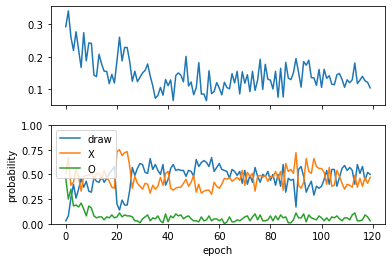

In [204]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(history['loss'])
ax[1].set( ylabel='loss')
ax[1].plot(history['draw'], label='draw')
ax[1].plot(history['X'], label='X')
ax[1].plot(history['O'], label='O')
ax[1].set( ylim=[0,1], xlabel='epoch', ylabel='probability')
ax[1].legend()

In [205]:
Qs[1].save('saved_model/TTT_model_player_1')
Qs[2].save('saved_model/TTT_model_player_2')

INFO:tensorflow:Assets written to: saved_model/TTT_model_player_1/assets
INFO:tensorflow:Assets written to: saved_model/TTT_model_player_2/assets


In [206]:
ttt = TicTacToe()

valid_moves = ttt.next_moves()
new_board = random.choice(valid_moves)
ttt.play(new_board)
print(np.reshape(ttt.board,(3,3)),"\n")

while ttt.status=="Ongoing":
  current_board = ttt.board
  valid_moves = ttt.next_moves()
  current_player = ttt.next_player
  if len(valid_moves)==0:
    break
  scores = Qs[current_player].predict(current_board[np.newaxis,...])
  scores = scores[0][current_board==0]
  print(scores)
  max_idx = np.argmax(scores)
  next_board = valid_moves[max_idx]
  ttt.play(next_board)
  print(np.reshape(ttt.board,(3,3)),"\n")

print("[Winner]:",ttt.winner)

[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]] 

[0.41592458 0.34622985 0.3378985  0.47364753 0.58654755 0.32037878
 0.51391745 0.3399105 ]
[[0. 0. 0.]
 [1. 0. 2.]
 [0. 0. 0.]] 

[0.2767143  0.68467605 0.3810703  0.30977398 0.36867487 0.3296886
 0.6686859 ]
[[0. 1. 0.]
 [1. 0. 2.]
 [0. 0. 0.]] 

[0.38962334 0.24353555 0.33575737 0.19905856 0.54647577 0.23455685]
[[0. 1. 0.]
 [1. 0. 2.]
 [0. 2. 0.]] 

[0.1008108 0.2674723 0.1937125 0.3001588 0.8000561]
[[0. 1. 0.]
 [1. 0. 2.]
 [0. 2. 1.]] 

[0.34455085 0.17660874 0.15816551 0.09755042]
[[2. 1. 0.]
 [1. 0. 2.]
 [0. 2. 1.]] 

[0.03461957 0.03789225 0.07664704]
[[2. 1. 0.]
 [1. 0. 2.]
 [1. 2. 1.]] 

[0.07699335 0.02895868]
[[2. 1. 2.]
 [1. 0. 2.]
 [1. 2. 1.]] 

[0.00065523]
[[2. 1. 2.]
 [1. 1. 2.]
 [1. 2. 1.]] 

[Winner]: 0


In [207]:
winners = []
for i in range(100):
  ttt = TicTacToe()
  valid_moves = ttt.next_moves()
  new_board = random.choice(valid_moves)
  ttt.play(new_board)
  
  while ttt.status=="Ongoing":
    current_board = ttt.board
    valid_moves = ttt.next_moves()
    current_player = ttt.next_player
    if len(valid_moves)==0:
      break
    scores = Qs[current_player].predict(current_board[np.newaxis,...])
    scores = scores[0][current_board==0]
    #print(scores)
    max_idx = np.argmax(scores.flatten())
    next_board = valid_moves[max_idx]
    ttt.play(next_board)
    #print(ttt.board,"\n")

  winners.append(ttt.winner)

In [208]:
winners_against_random = []
for i in range(100):
  ttt = TicTacToe()
  valid_moves = ttt.next_moves()
  new_board = random.choice(valid_moves)
  ttt.play(new_board)
  
  while ttt.status=="Ongoing":
    current_board = ttt.board
    valid_moves = ttt.next_moves()
    if len(valid_moves)==0:
      break
    current_player = ttt.next_player
    if current_player==1:
      scores = Qs[current_player].predict(current_board[np.newaxis,...])
      scores = scores[0][current_board==0]
      max_idx = np.argmax(scores.flatten())
      next_board = valid_moves[max_idx]
    else:
      next_board = random.choice(valid_moves)
    ttt.play(next_board)

  winners_against_random.append(ttt.winner)

In [209]:
random_winners = []
for i in range(100):
    ttt = TicTacToe()
    while ttt.status=="Ongoing":
        valid_moves = ttt.next_moves()
        if len(valid_moves)==0:
            break
        new_board = random.choice(valid_moves)
        ttt.play(new_board)
    ttt.board
    random_winners.append(ttt.winner)

<AxesSubplot:>

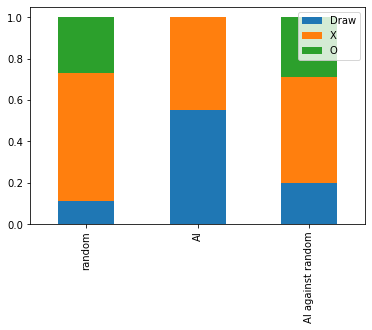

In [210]:
df_ai = pd.Series({x:winners.count(x) for x in set(winners)}, name='AI').to_frame()
df_ai_against_random = pd.Series({x:winners_against_random.count(x) for x in set(winners_against_random)}, name='AI against random').to_frame()
df_random = pd.Series({x:random_winners.count(x) for x in set(random_winners)}, name='random').to_frame()

df = pd.concat([df_random, df_ai, df_ai_against_random], axis=1)

df = df/df.sum(axis=0)

df.index = df.index.map({0:'Draw',1:"X",2:"O"})

df.T.plot(kind='bar', stacked=True)